# CNNを構築し、MNIST datasetに対するClassificationの精度を向上させる

In [3]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, InputLayer
from keras.optimizers import RMSprop

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train = x_train.reshape(60000, 784)
x_test  = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255
x_test  /= 255
y_train = keras.utils.to_categorical(y_train, 10)
y_test  = keras.utils.to_categorical(y_test, 10)

In [6]:
model = Sequential()
model.add(InputLayer(input_shape=(784, )))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
epochs = 20
batch_size = 128
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.6090 - acc: 0.8463 - val_loss: 0.3420 - val_acc: 0.9085
Epoch 2/20
60000/60000 [==============================] - 1s 9us/step - loss: 0.3309 - acc: 0.9080 - val_loss: 0.2996 - val_acc: 0.9163
Epoch 3/20
60000/60000 [==============================] - 1s 9us/step - loss: 0.3016 - acc: 0.9160 - val_loss: 0.2861 - val_acc: 0.9213
Epoch 4/20
60000/60000 [==============================] - 1s 9us/step - loss: 0.2882 - acc: 0.9192 - val_loss: 0.2787 - val_acc: 0.9229
Epoch 5/20
60000/60000 [==============================] - 1s 9us/step - loss: 0.2803 - acc: 0.9212 - val_loss: 0.2749 - val_acc: 0.9235
Epoch 6/20
60000/60000 [==============================] - 1s 9us/step - loss: 0.2745 - acc: 0.9232 - val_loss: 0.2732 - val_acc: 0.9248
Epoch 7/20
60000/60000 [==============================] - 1s 9us/step - loss: 0.2703 

In [10]:
score = model.evaluate(x_test, y_test, verbose=1)
print()
print('Test loss:', score[0])
print('Test accr:', score[1])

10000/10000 [==============================] - 0s 11us/step

Test loss: 0.26822192800045014
Test accr: 0.9288


## CNNを構築する

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### テスト用のデータセットを更にテスト用と検証用に分割する（なぜ？）

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train1, x_valid, y_train1, y_valid = train_test_split(x_train, y_train, test_size=0.175)

### Modelの構築

In [15]:
from keras.layers import Conv2D, MaxPooling2D

In [17]:
from keras.layers import Flatten

In [18]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3,), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

### 学習データの整形

まずは、画素数が28×28の画像データを784個の要素を持つ一次元配列に変換

In [21]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_valid = x_valid.reshape(x_valid.shape[0], 28, 28, 1)
x_test  = x_test.reshape(x_test.shape[0], 28, 28, 1)

画素値(0~255)を0~1の小数値に変換。

In [23]:
x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255
x_valid /= 255
x_test  /= 255

ラベルをone-hot vectorに変換する

In [24]:
y_train = keras.utils.to_categorical(y_train, 10)
y_valid = keras.utils.to_categorical(y_valid, 10)
y_test  = keras.utils.to_categorical(y_test, 10)

### 学習

In [27]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_valid, y_valid))

Train on 60000 samples, validate on 10500 samples
Epoch 1/10
60000/60000 [==============================] - 106s 2ms/step - loss: 0.2182 - acc: 0.9330 - val_loss: 0.0481 - val_acc: 0.9850
Epoch 2/10
60000/60000 [==============================] - 106s 2ms/step - loss: 0.0792 - acc: 0.9763 - val_loss: 0.0367 - val_acc: 0.9884
Epoch 3/10
60000/60000 [==============================] - 107s 2ms/step - loss: 0.0618 - acc: 0.9820 - val_loss: 0.0240 - val_acc: 0.9924
Epoch 4/10
60000/60000 [==============================] - 103s 2ms/step - loss: 0.0538 - acc: 0.9840 - val_loss: 0.0196 - val_acc: 0.9936
Epoch 5/10
60000/60000 [==============================] - 102s 2ms/step - loss: 0.0474 - acc: 0.9858 - val_loss: 0.0159 - val_acc: 0.9954
Epoch 6/10
60000/60000 [==============================] - 109s 2ms/step - loss: 0.0444 - acc: 0.9867 - val_loss: 0.0154 - val_acc: 0.9955
Epoch 7/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0422 - acc: 0.9881 - val_loss: 0.0164 - 

In [29]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accu:', score[1])

Test loss: 0.03938075944198517
Test accu: 0.9889


epoch数がたったの10にもかかわらず、Test accuracyが0.98989となり、CNNを使わない学習よりも精度が向上している。

### 学習過程の可視化

In [34]:
%matplotlib notebook

精度の推移をプロット

<IPython.core.display.Javascript object>


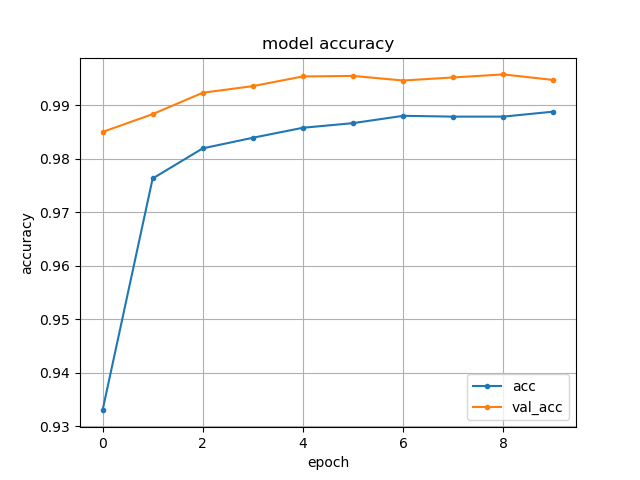

In [35]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], marker='.', label='acc')
plt.plot(history.history['val_acc'], marker='.', label='val_acc')
plt.title('model accuracy')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.show()

損失の推移をプロット

<IPython.core.display.Javascript object>


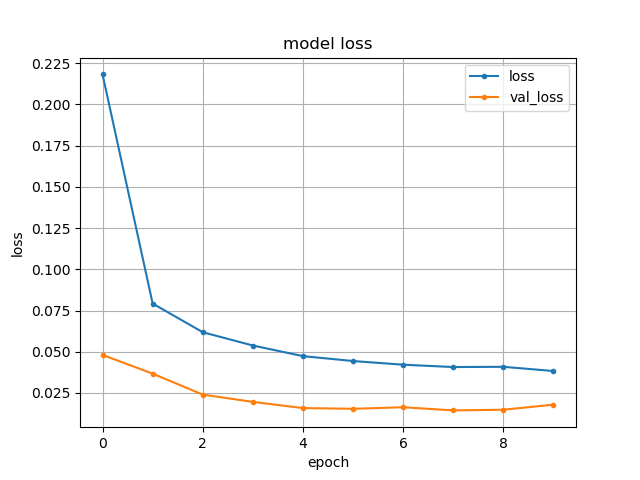

In [37]:
plt.plot(history.history['loss'], marker='.', label='loss')
plt.plot(history.history['val_loss'], marker='.',label='val_loss')
plt.title('model loss')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()